In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
july_17_again_paths = [
    "july_15_again/seed_1234_sample_rate_1_lr_0.01_n_epochs_200_hidden_dim_2_log.pkl",
    "july_15_again/seed_1234_sample_rate_5_lr_0.01_n_epochs_200_hidden_dim_2_log.pkl", 
    "july_15_again/seed_1234_sample_rate_10_lr_0.01_n_epochs_200_hidden_dim_2_log.pkl"
]

july_18_paths = [
    "july_16/seed_1234_sample_rate_1_lr_0.1_n_epochs_200_hidden_dim_2_patience_50_log.pkl",
    "july_16/seed_1234_sample_rate_5_lr_0.1_n_epochs_200_hidden_dim_2_patience_50_log.pkl",
    "july_16/seed_1234_sample_rate_10_lr_0.1_n_epochs_200_hidden_dim_2_patience_50_log.pkl"
]




In [3]:
logs1 = []
logs2 = []
for path1, path2 in zip(july_17_again_paths, july_18_paths):
    with open(path1, 'rb') as file:
        logs1.append(pickle.load(file))

    with open(path2, 'rb') as file:
        logs2.append(pickle.load(file))
        

In [4]:
lrs = []
sample_rates = [1,5,10]
tot_samples = 2000

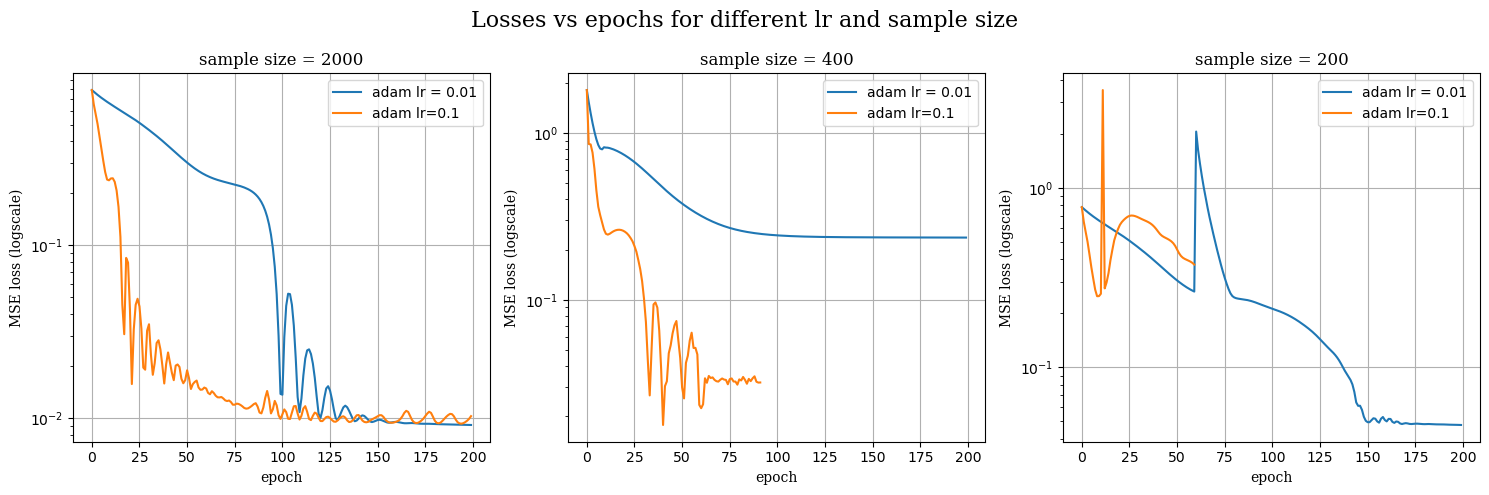

In [5]:
figs, ax = plt.subplots(1,3, figsize = (15,5))
for idx in range(3):
    ax[idx].plot(logs1[idx]["losses"], label="adam lr = 0.01")
    ax[idx].plot(logs2[idx]["losses"], label="adam lr=0.1")
    ax[idx].legend(loc="upper right")
    ax[idx].set_yscale('log')
    ax[idx].grid(True)
    ax[idx].set_ylabel("MSE loss (logscale)", family='serif')
    ax[idx].set_xlabel("epoch",family='serif')
    ax[idx].set_title(f"sample size = {tot_samples // sample_rates[idx]}", family='serif')

plt.suptitle("Losses vs epochs for different lr and sample size", size = 16, family = 'serif')
plt.tight_layout()
plt.savefig("loss_vs_epoch.png")
plt.show()